In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
ins_df=pd.read_csv("D:\Medical_Insurance_Forecast\insurance.csv")

In [3]:
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#EDA
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

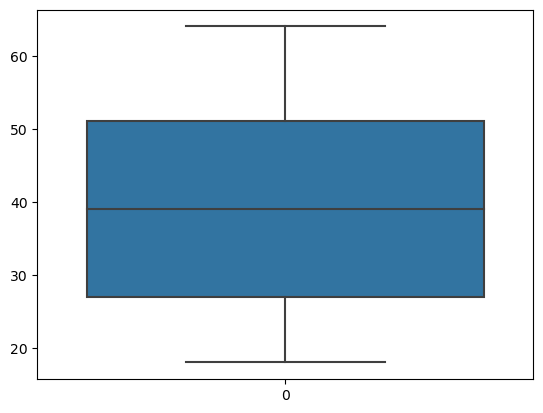

In [5]:
#outliers
sns.boxplot(ins_df['age'])
plt.show()

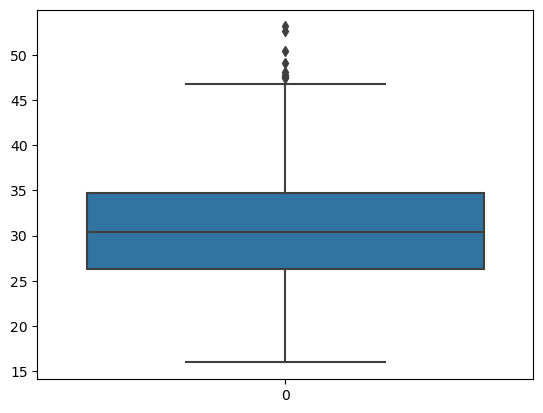

In [6]:
sns.boxplot(ins_df['bmi'])
plt.show()

In [7]:
#iqr
q1=ins_df['bmi'].quantile(0.25)
q3=ins_df['bmi'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

26.29625 34.69375 8.3975


In [8]:
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
print(upper_bound,lower_bound)

47.290000000000006 13.7


In [9]:
ins_df['bmi']=ins_df['bmi'].apply(lambda x: upper_bound if x>upper_bound else lower_bound if x<lower_bound else x)

<Axes: >

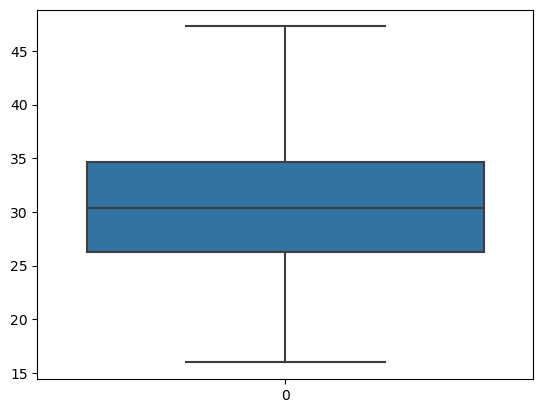

In [10]:
sns.boxplot(ins_df['bmi'])

In [11]:
#encoding
ins_df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
ins_df['sex']=ins_df['sex'].replace({'male':1,'female':2})

In [13]:
ins_df['smoker']=ins_df['smoker'].map({'yes':1,'no':0})

In [14]:
ins_df=pd.get_dummies(ins_df,columns=['region'],drop_first=True)

In [15]:
ins_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,2,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,2,31.920,0,0,2205.98080,False,False,False
1335,18,2,36.850,0,0,1629.83350,False,True,False
1336,21,2,25.800,0,0,2007.94500,False,False,True


In [16]:
ins_df=ins_df.astype(int)

In [17]:
ins_df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,2,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,2,31,0,0,2205,0,0,0
1335,18,2,36,0,0,1629,0,1,0
1336,21,2,25,0,0,2007,0,0,1


In [18]:
#Polynomialfeatures
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X=ins_df.drop('charges',axis=1)

In [20]:
y=ins_df['charges']

In [21]:
poly=PolynomialFeatures(degree=2)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)

In [24]:
pml=LinearRegression()

In [25]:
pml.fit(X_poly_train,y_train)

LinearRegression()

In [26]:
y_pred=pml.predict(X_poly_test)

In [27]:
y_pred

array([11280.43359375,  5883.8359375 , 32723.4765625 , 10700.421875  ,
       28456.3515625 ,  4189.        ,  2706.16796875, 16312.26171875,
        4173.28515625, 12074.57226562, 20183.25390625,  9356.88671875,
        5844.109375  , 49716.18164062, 52443.93164062, 44834.83984375,
       10489.56054688, 41500.4609375 , 10089.90625   , 24933.63671875,
        2892.359375  ,  8123.86523438,  2036.49414062,  5385.37890625,
       12771.59179688, 12265.46679688, 14234.31835938,  7881.1875    ,
       11957.29296875,  3204.9140625 ,  8655.62695312, 12448.01757812,
        3107.96484375,  6633.33007812,  3691.33984375,  8488.25195312,
        4105.46875   ,  8717.98046875, 25421.72460938, 37218.47265625,
        5011.04492188,  4896.00390625, 13191.1015625 , 13347.60351562,
        6751.63085938, 14057.515625  ,  6374.56445312,  5406.046875  ,
       39273.22265625,  5951.80078125, 15425.04101562,  4124.70703125,
        8006.06445312,  3436.828125  , 13182.01171875, 11976.10742188,
      

In [28]:
r2=r2_score(y_test,y_pred)

In [29]:
r2*100

86.77089083344678

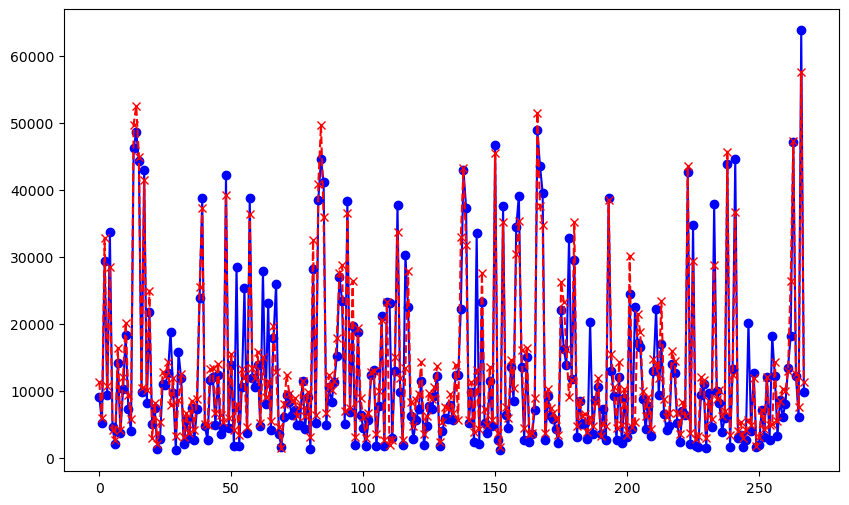

In [30]:
plt.figure(figsize=(10,6))
plt.plot(y_test.reset_index(drop=True),label='Actual',color='blue',linestyle='-',marker='o')
plt.plot(y_pred,label='predicted',color='red',linestyle='--',marker='x')
plt.show()

## Tried with multiple Linear Regression-76%,lasso-73%,ridge-73% , the best was Polynomial regression with 86%